### IDs:
Insert yours IDs to the cell below

ID #1: 313288284

ID #2:205570989


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import matplotlib as mpl
from scipy.stats import nbinom
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import gamma


### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [4]:
def find_batch(p,o,r=1):
    X = nbinom(r,p,loc=r)
    i = range(0,int(np.round(3*r/p,0)))
    f_X_i = X.cdf([xx for xx in i])
    count = 0 
    for i in f_X_i:
        if i < o:
            count = count+ 1
    return (count)


In [5]:
find_batch(0.03,0.85)

63

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [6]:
find_batch(0.04,0.95)

74

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

for product 1 we need a batch of  78 products
for product 2 we need a batch of  64 products


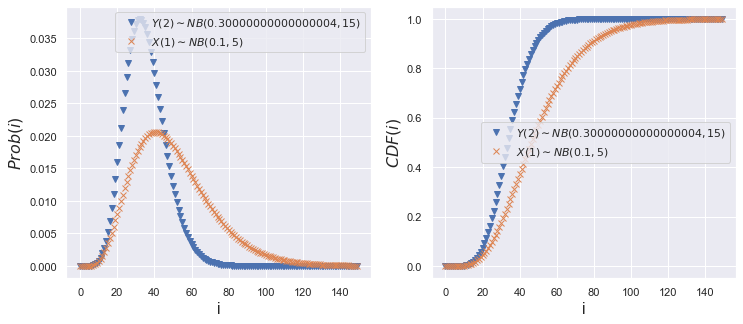

In [16]:
# Correct behaviour
r = 5
p = 0.1
m = 3
T= 0.3

X = nbinom(r,p,loc=r)
Y = nbinom(r*m,p*m)

i = range(0,int(np.round(3*r/p,0)))

p_X_i = X.pmf([xx for xx in i])
p_Y_i = Y.pmf([xx for xx in i])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(i,p_Y_i,'v',label="$Y(2)\sim NB({{{0}}},{{{1}}})$".format(p*m,r*m))
plt.plot(i,p_X_i,'x',label="$X(1)\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=16)
plt.ylabel('$Prob(i)$',fontsize=16)
plt.legend()

f_X_i = X.cdf([xx for xx in i])
f_Y_i = Y.cdf([xx for xx in i])

plt.subplot(1,2,2)
plt.plot(i,f_Y_i,'v',label="$Y(2)\sim NB({{{0}}},{{{1}}})$".format(p*m,r*m))
plt.plot(i,f_X_i,'x',label="$X(1)\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=16)
plt.ylabel('$CDF(i)$',fontsize=16)
plt.legend()

print( 'For product 1 we need a batch of ' ,find_batch(0.1,0.9,5), 'products')
print( 'For product 2 we need a batch of ' ,find_batch(0.3,0.9,15), 'products')


# NEED TO ADD EXPLANTION 


In [68]:
%%latex
Its a negative binomial question, In negative binomial questions, we can see that for a similar confidence level,
two distributions with the same rate between the probability of success and the number o success needed.
The one with the higher success rate will have a higher distribution that 
when we look at the CDF function we will get to the required confidence level in fewer attempts

<IPython.core.display.Latex object>

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [17]:
def make_hist1(mean,median,n,iqr,sigma):
    l1 = np.ones(int(0.1*n))*median
    l2 = np.random.normal(int(mean-0.5*iqr+(mean-median)*0.11), sigma,int( n*0.45))
    l3 = np.random.normal(int(mean+0.5*iqr+(mean-median)*0.11), sigma,int( n*0.45))
    l = np.concatenate((l1, l2,l3))
    return(l)


In [18]:
sh1_mean,sh1_median,sh1_n,sh1_iqr,sh1_sigma = 6300, 4600, 16000, 5000 , 200
rg1_mean,rg1_median,rg1_n,rg1_iqr,rg1_sigma = 4200, 4600, 22000, 5500 , 200
SH1  = make_hist1(sh1_mean,sh1_median,sh1_n,sh1_iqr,sh1_sigma)
RG1 = make_hist1(rg1_mean,rg1_median,rg1_n,rg1_iqr,rg1_sigma)
sh1q75, sh1q25 = np.percentile(SH1, [75 ,25])
sh1iqr = sh1q75 - sh1q25
rg1q75, rg1q25 = np.percentile(RG1, [75 ,25])
rg1iqr = rg1q75 - rg1q25


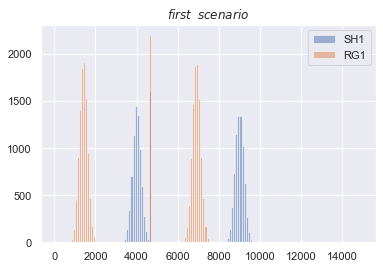

SH1 mean =  6298.017684883105 SH1 median =  4600.0 SH1 iqr =  4941.777302412645
RG1 mean =  4199.660436302311 RG1 median =  4600.0 RG1 iqr =  5439.8408661852145


In [29]:
bins = range(100,15000,100)
plt.hist(SH1, bins, alpha=0.5, label='SH1')
plt.hist(RG1, bins, alpha=0.5, label='RG1')
plt.legend(loc='upper right')
plt.title('$first$  $scenario$')
plt.show()
print( 'SH1 mean = ' ,np.mean(SH1),'SH1 median = ', np.median(SH1) ,'SH1 iqr = ',sh1iqr) 
print( 'RG1 mean = ' , np.mean(RG1), 'RG1 median = ', np.median(RG1), 'RG1 iqr = ' ,rg1iqr)

In [31]:
def make_hist2(mean,median,n,iqr,sigma):
    l1 = np.ones(int(0.1*n))*median
    l2 = np.random.normal(int(mean-0.5*iqr+(mean-median)*0.11), sigma,int( n*0.225))
    l3 = np.random.normal(int(mean+0.5*iqr+(mean-median)*0.11), sigma,int( n*0.225))
    l4 = np.random.normal(int(mean-0.75*iqr+(mean-median)*0.11), sigma,int( n*0.225))
    l5 = np.random.normal(int(mean+0.75*iqr+(mean-median)*0.11), sigma,int( n*0.225))
    l = np.concatenate((l1, l2,l3,l4,l5))
    return(l)
sh2_mean,sh2_median,sh2_n,sh2_iqr,sh2_sigma = 6300, 4600, 16000, 4000 , 100
rg2_mean,rg2_median,rg2_n,rg2_iqr,rg2_sigma = 4200, 4600, 22000, 4500 , 300
SH2  = make_hist2(sh2_mean,sh2_median,sh2_n,sh2_iqr,sh2_sigma)
RG2 = make_hist2(rg2_mean,rg2_median,rg2_n,rg2_iqr,rg2_sigma)
sh2q75, sh2q25 = np.percentile(SH2, [75 ,25])
sh2iqr = sh2q75 - sh2q25
rg2q75, rg2q25 = np.percentile(RG2, [75 ,25])
rg2iqr = rg2q75 - rg2q25


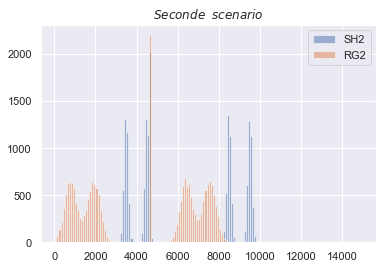

SH2 mean =  6298.0825692935 SH2 median =  4600.0 SH2 iqr =  4245.047062605883
RG2 mean =  4201.383980936637 RG2 median =  4600.0 RG2 iqr =  5228.402768653363


In [33]:
bins = range(100,15000,100)
plt.hist(SH2, bins, alpha=0.5, label='SH2')
plt.hist(RG2, bins, alpha=0.5, label='RG2')
plt.title('$Seconde$  $scenario$')
plt.legend(loc='upperC right')
plt.show()
print( 'SH2 mean = ' ,np.mean(SH2),'SH2 median = ', np.median(SH2) ,'SH2 iqr = ',sh2iqr)
print( 'RG2 mean = ' , np.mean(RG2), 'RG2 median = ', np.median(RG2), 'RG2 iqr = ' ,rg2iqr)

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [34]:
sh3_mean,sh3_median,sh3_n,sh3_iqr,sh3_sigma = 6300, 4600, 16000, 4400 , 300
rg3_mean,rg3_median,rg3_n,rg3_iqr,rg3_sigma = 4200, 4600, 22000, 4000 , 100
SH3  = make_hist2(sh3_mean,sh3_median,sh3_n,sh3_iqr,sh3_sigma)
RG3 = make_hist2(rg3_mean,rg3_median,rg3_n,rg3_iqr,rg3_sigma)
sh3q75, sh3q25 = np.percentile(SH3, [75 ,25])
sh3iqr = sh3q75 - sh3q25
rg3q75, rg3q25 = np.percentile(RG3, [75 ,25])
rg3iqr = rg3q75 - rg3q25

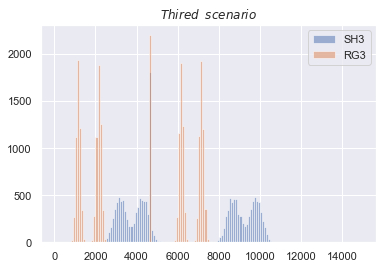

SH3 mean =  6296.175388356937 SH3 median =  4600.0 SH3 iqr =  4941.777302412645 SH3 Var =  7498369.045451048
RG3 mean =  4200.310210818482 RG3 median =  4600.0 RG3 iqr =  5439.8408661852145 RG3 Var =  5875751.383382133


In [38]:
bins = range(100,15000,100)
plt.hist(SH3, bins, alpha=0.5, label='SH3')
plt.hist(RG3, bins, alpha=0.5, label='RG3')
plt.title('$Thired$  $scenario$')
plt.legend(loc='upper right')
plt.show()
print( 'SH3 mean = ' ,np.mean(SH3),'SH3 median = ', np.median(SH3) ,'SH3 iqr = ',sh1iqr , 'SH3 Var = ' ,np.var(SH3))
print( 'RG3 mean = ' , np.mean(RG3), 'RG3 median = ', np.median(RG3), 'RG3 iqr = ' ,rg1iqr, 'RG3 Var = ', np.var(RG3))

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [44]:
sh4_mean,sh4_median,sh4_n,sh4_iqr,sh4_sigma = 12500, 12000, 16000, 4000 , 300
SH_PHI = make_hist2(sh4_mean,sh4_median,sh4_n,sh4_iqr,sh4_sigma)
sh4q75, sh4q25 = np.percentile(SH_PHI, [75 ,25])
sh4iqr = sh4q75 - sh4q25
print( 'SH1 mean = ' ,np.mean(SH1),'SH1 median = ', np.median(SH1) ,'SH1 iqr = ',sh1iqr , 'SH1 Var = ' ,np.var(SH1))
print( 'SH_PHI mean = ' ,np.mean(SH_PHI),'SH_PHI median = ', np.median(SH_PHI) ,'SH_PHI iqr = ',sh4iqr , 'SH_PHI Var = ' ,np.var(SH_PHI))

SH1 mean =  6298.017684883105 SH1 median =  4600.0 SH1 iqr =  4941.777302412645 SH1 Var =  5977471.509765508
SH_PHI mean =  12498.486706182472 SH_PHI median =  12000.0 SH_PHI iqr =  4687.185464014854 SH_PHI Var =  5946125.114944097


In [45]:
Covariance = np.cov(np.sort(SH1), np.sort(SH_PHI), rowvar = True)[0][1]
print('Covariance = ',Covariance,'𝛼 = ' ,Covariance/((np.var(SH1)**0.5) * (np.var(SH_PHI)**0.5)))

Covariance =  5814830.37504899 𝛼 =  0.9753517587408553


In [46]:
rg4_mean,rg4_median,rg4_n,rg4_iqr,rg4_sigma = 8500, 8000, 22000, 3500 , 1450
RG_PHI = make_hist2(rg4_mean,rg4_median,rg4_n,rg4_iqr,rg4_sigma)
rg4q75, rg4q25 = np.percentile(RG_PHI, [75 ,25])
rg4iqr = rg4q75 - rg4q25
print( 'RG1 mean = ' ,np.mean(RG1),'RG1 median = ', np.median(RG1) ,'RG1 iqr = ',sh1iqr , 'RG1 Var = ' ,np.var(RG1))
print( 'RG_PHI mean = ' ,np.mean(RG_PHI),'RG_PHI median = ', np.median(RG_PHI) ,'RG_PHI iqr = ',sh4iqr , 'RG_PHI Var = ' ,np.var(RG_PHI))

RG1 mean =  4199.660436302311 RG1 median =  4600.0 RG1 iqr =  4941.777302412645 RG1 Var =  6856903.88843046
RG_PHI mean =  8527.873877930777 RG_PHI median =  8016.364099552204 RG_PHI iqr =  4687.185464014854 RG_PHI Var =  6392372.9792992165


In [48]:
Covariance = np.cov(np.sort(RG1), np.sort(RG_PHI), rowvar = True)[0][1]
print('Covariance = ',Covariance,'𝛼 = ' ,Covariance/((np.var(RG1)**0.5) * (np.var(RG_PHI)**0.5)))

Covariance =  5918218.937892681 𝛼 =  0.8939144193972594


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

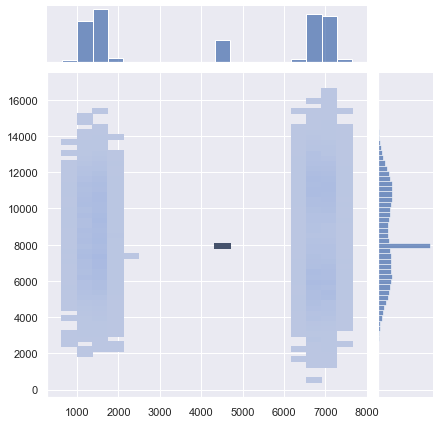

In [50]:
sns.jointplot(x=RG1, y=RG_PHI, kind='hist')
plt.show()

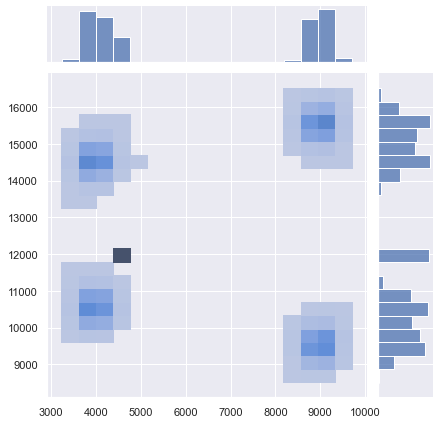

In [51]:
sns.jointplot(x=SH1, y=SH_PHI, kind='hist')
plt.show()

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

In [52]:
%%latex
1.variante of three random variables

$$Var(X+Y+Z)=Var(X)+Var(Y)+Var(Z)+2Cov(X,Y)+2Cov(X,Z)+2Cov(Y,Z)$$

2.X,Y,Z are pairwise independent

$$Cov(X,Y)=0 $$
$$Cov(X,Z)=0 $$
$$Cov(Y,Z)=0 $$
$$Var(X+Y+Z)=Var(X)+Var(Y)+Var(Z)$$

3. Not necessarilly
events A, B, and C are mutually independent if they are pairwise independent and P(A ∩ B ∩ C) = P(A) × P(B) × P(C)
$$Counter-example :$$
    
$$P(A)=P(B)=P(C)=1/2$$
$$P(A∩B)=P(A∩C)=P(B∩C)=1/4.$$
$$P(A∩B∩C)=0 $$  $$while P(A)P(B)P(C)=1/8$$    

<IPython.core.display.Latex object>

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

C:\Users\user\.spss\Anconda5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\.spss\Anconda5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\.spss\Anconda5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:ylabel='Density'>

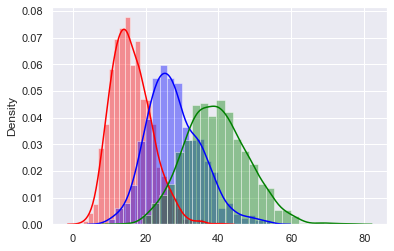

In [53]:
def P_normal(mean = 10,var= 3, n =1000):
    return(np.random.normal(mean, var,n))

def P_gamma(shape = 2, scale = 2,n= 1000):
    return(np.random.gamma(shape, scale, n))
    
def NFflodConv(P,n):
    Q = np.zeros(1000)
    if P == 'normal':
        for  i in range(n):
            P = P_normal()
            Q = Q+P
    elif P == 'gamma':
        for  i in range(n):
            P = P_gamma()
            Q = Q+P
    return Q

P  = 'gamma'
Q = NFflodConv(P,4)
sns.distplot( Q, color = 'red')
sns.distplot( NFflodConv(P,7), color = 'blue')
sns.distplot( NFflodConv(P,10), color = 'green')





#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [54]:
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0,size):
        list_of_objects.append( list() ) #different object reference each time
    for j in range(size):
        list_of_objects[j] = [0,0]
    return list_of_objects


In [55]:
def make_list(m,last,first):
    k = init_list_of_objects(last-first+1)
    for i in m:
        k[(i[0]-first)][1] += i[1]
    for i in range(len(k)):
        k[i][0]= i+first
    return k

In [56]:
def comput(a,b):
    m = []
    for i in a:
        for j in b:
            m.append([(i[0]+j[0]),(i[1]*j[1])])
            last = int(i[0]+j[0])
    
    
    first = m[0][0]
    return(make_list (m, last , first))


a= [[1,1/8],[2,1/8],[3,1/8],[4,1/8],[5,1/8],[6,1/8],[7,1/8],[8,1/8]]
b= [[1,1/8],[2,1/8],[3,1/8],[4,1/8],[5,1/8],[6,1/8],[7,1/8],[8,1/8]]
for i in range(16):
    a  = (comput(a,b))
octahedron_17 = a    

    

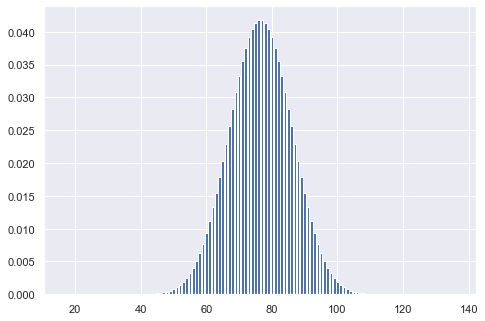

In [845]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tags = []
values = []
for i in octahedron_17:
    tags.append(i[0])
    values.append(i[1])
ax.bar(tags,values)
plt.show()


#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

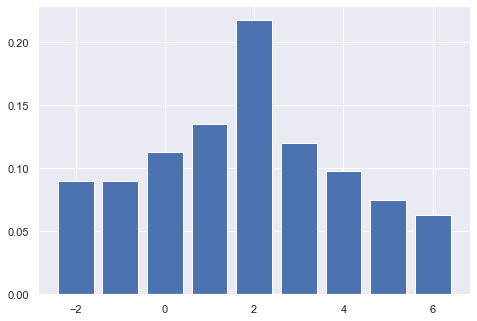

[[-2, 0.09],
 [-1, 0.09],
 [0, 0.1125],
 [1, 0.135],
 [2, 0.21749999999999997],
 [3, 0.12],
 [4, 0.0975],
 [5, 0.075],
 [6, 0.0625]]

In [57]:
c =[[-1,0.3],[0,0.15],[1,0.15],[2,0.15],[3,0.25]]
d =[[-1,0.3],[0,0.15],[1,0.15],[2,0.15],[3,0.25]]
stock_2_days  = (comput(c,d))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tags = []
values = []
for i in stock_2_days:
    tags.append(i[0])
    values.append(i[1])
ax.bar(tags,values)
plt.show()
stock_2_days

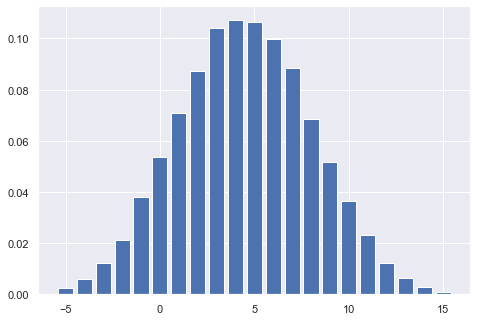

[[-5, 0.00243],
 [-4, 0.006075],
 [-3, 0.012149999999999998],
 [-2, 0.021262499999999997],
 [-1, 0.038221874999999995],
 [0, 0.053738437499999986],
 [1, 0.07074843749999998],
 [2, 0.08720156249999998],
 [3, 0.10407656249999997],
 [4, 0.10719843749999998],
 [5, 0.10638843749999999],
 [6, 0.09968906249999998],
 [7, 0.08860781249999998],
 [8, 0.0683578125],
 [9, 0.0517078125],
 [10, 0.0363571875],
 [11, 0.0233671875],
 [12, 0.0120703125],
 [13, 0.0064453125],
 [14, 0.0029296875],
 [15, 0.0009765625]]

In [59]:
for i in range(4):
    c = (comput(c,d))
stock_5_days = c 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tags = []
values = []
for i in stock_5_days:
    tags.append(i[0])
    values.append(i[1])
ax.bar(tags,values)
plt.show()
stock_5_days

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [60]:
gained = 0
lost = 0
for i in stock_5_days:
    if i[0] < -4:
        lost += i[1]
    if i[0] > 7:
        gained += i[1]

gained, lost
        
        

(0.202211875, 0.00243)

In [64]:
%%latex
1.The probability that the stock has gained strictly more than 7NIS after 5 days
Its the sum all of the senrios probabilities where the stock gaind more than 7 nis 
$$p(X=8 ) + p(X=9) .... +p(x = 15) = 0.202211875 $$

1.The probability that the stock has lost strictly more than 4NIS after 5 days
Its the sum all of the senrios probabilities where the stock lost more than 4 nis (only when it lost 5)
$$p(X=-5)= 0.00243) $$


<IPython.core.display.Latex object>